In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from data_processing import *
from utils import feature_desc

from sklearn.preprocessing import StandardScaler

#### Load data

In [8]:
df_og = pd.read_csv(os.path.join(MAIN_PATH, "data", "data.csv"))

# copied from load() function but modified to aggregate data and not drop it

df_og['czas'] = pd.to_datetime(df_og['czas'], utc=True)
df_og.set_index('czas', inplace=True)


temp_zuz = pd.read_csv(os.path.join(MAIN_PATH, "data", "temp_zuz_fixed.csv"))


temp_zuz['Czas'] = pd.to_datetime(temp_zuz['Czas'], utc=True)
temp_zuz.set_index('Czas', inplace=True)
temp_zuz = temp_zuz.rename(columns={'Czas': 'czas'})


df_og = df_og.join(temp_zuz['temp_zuz'])

#### Aggregate time into clusters of size k

In [9]:
k = 15
df_og = aggregate(df_og, k)

### Proste featury wybieram albo tworze agregując


In [10]:
df = pd.DataFrame(index=df_og.index)

In [11]:
# srednia po 'WODY POWROTNE KOLEKTORÓW [°C]'
TIR = df_og.columns[df_og.columns.str.contains('tir')].values
df['TIR'] = df_og[TIR].mean(axis='columns')

In [12]:
# srednia po 'TEMP POD 2 WARSTWĄ WYMURÓWKI [°C]'
TIX1 = df_og.columns[df_og.columns.str.contains('001tix')].values
df['TIX1'] = df_og[TIX1].mean(axis='columns')

In [13]:
# prob_s i prob_corg
PR = ['prob_s', 'prob_corg']
df[PR] = df_og[PR]

In [14]:
# reg nadawy koncentratu
FCX = df_og.columns[df_og.columns.str.contains('fcx')].values
df['FCX'] = df_og[FCX].mean(axis='columns')

In [15]:
# sumaryczna moc cieplna
NIR = df_og.columns[df_og.columns.str.contains('nir')].values
df['NIR'] = df_og[NIR]

In [16]:
# WENT ODCZ ZAD OBROTÓW
UXM = df_og.columns[df_og.columns.str.contains('uxm')].values
df['UXM'] = df_og[UXM].mean(axis='columns')

In [17]:
# dodanie temperatury żużla
df["temp_zuz"] = df_og["temp_zuz"]

In [18]:
df1, df2, df3 = split(df, proportions=(0.7, 0.15, 0.15))

## Generalnie to wypierdalam outlierów

In [19]:
df = df.loc[(df_og.temp_zuz < 1319) & (df_og.temp_zuz > 1280)]

<AxesSubplot:xlabel='czas', ylabel='temp_zuz'>

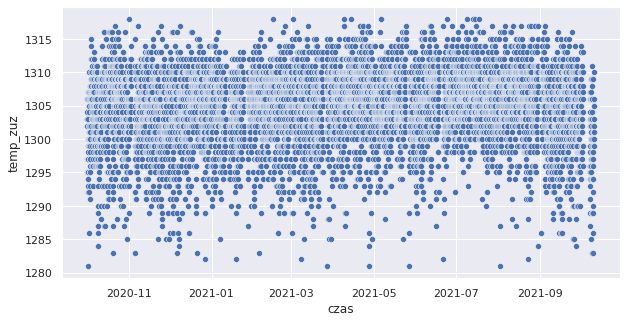

In [20]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.scatterplot(data=df, x='czas', y="temp_zuz")

## Data is now ready to do somthing with it
## Eventually you can scale the data as follows

In [21]:
df1.head(3)

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,temp_zuz
czas,,,,,,,,
2020-09-30 22:00:00+00:00,29.090193,418.987794,9.87,8.6,36.152944,14.384833,92.173463,1297.0
2020-09-30 22:15:00+00:00,29.054909,418.976831,9.87,8.6,36.037006,14.551195,92.173879,NaN
2020-09-30 22:30:00+00:00,29.013282,418.956943,9.87,8.6,36.102824,14.731094,92.173529,NaN


In [22]:
df1, df2, df3 = scale(df1, df2, df3)

In [23]:
df1.head(3)

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,temp_zuz
czas,,,,,,,,
2020-09-30 22:00:00+00:00,0.517242,0.462989,-1.4621,-0.572118,0.142896,-1.242959,0.087291,1297.0
2020-09-30 22:15:00+00:00,0.463288,0.461079,-1.4621,-0.572118,0.130519,-1.200510,0.087324,NaN
2020-09-30 22:30:00+00:00,0.399633,0.457614,-1.4621,-0.572118,0.137545,-1.154607,0.087296,NaN


In [18]:
df1.to_csv('../data/train.csv')
df2.to_csv('../data/test.csv')
df3.to_csv('../data/val.csv')

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,temp_zuz
czas,,,,,,,,
2020-09-30 22:00:00+00:00,0.517242,0.462989,-1.462100,-0.572118,0.142896,-1.242959,0.087291,1297.0
2020-09-30 22:15:00+00:00,0.463288,0.461079,-1.462100,-0.572118,0.130519,-1.200510,0.087324,NaN
2020-09-30 22:30:00+00:00,0.399633,0.457614,-1.462100,-0.572118,0.137545,-1.154607,0.087296,NaN
2020-09-30 22:45:00+00:00,0.342163,0.453715,-1.462100,-0.572118,0.134175,-1.116688,0.087677,NaN
2020-09-30 23:00:00+00:00,0.372216,0.449703,-1.462100,-0.572118,0.124480,-1.091612,0.088454,1295.0
...,...,...,...,...,...,...,...,...
2021-06-20 14:30:00+00:00,0.246738,-0.353205,0.525596,1.364181,-3.716795,-2.071107,-4.075935,NaN
2021-06-20 14:45:00+00:00,0.282464,-0.373917,0.525596,1.364181,-3.716795,-2.057234,-4.076152,NaN
2021-06-20 15:00:00+00:00,0.301510,-0.399040,0.525596,1.364181,-3.716795,-2.051470,-4.076353,NaN
